In [1]:
from IPython.display import Image
Image(filename='training_data/image3.png')

In [39]:
import glob
import cv2
import numpy as np

data_files = [file for file in sorted(glob.glob("training_data/*.png"))] 
# sort the files based on file name

data_files = sorted(data_files, key=lambda name: int(name[19:-4]))

# combine RGB channels to form black-and-white image
data = [np.asarray(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)) for file in data_files]

for i in range(0,len(data)):
    data[i] = np.asarray(data[i], dtype=np.uint32).flatten() / 255

data = np.asarray(data)
data = np.asarray((data.T - np.mean(data.T))/(np.std(data.T))).T

In [40]:
y_data1 = [1,0,9,1,1,0,1,8,3,5,1,5,3,1,6,8,7,1,8,0,1,1,9,8,1,7,6,9,0,2,0,3,2,2,0,9,4,2,7,2,0,3,7,1,8,0,1,6,3,2,1,5,4,1,4,2,1,0,2,1,6,9,6,1,2,2,1,9,1,3,5,8,1,7,2,2,1,5,2,0,4,3,1,3,2,3,9,4,5,1,7,1,3,6,3,6,1,2,4,2,0,5,2,2,1,1,7,1,1,5,6,1,8,8,2,2,1,1,5,6,1,2,4,1,3,7,1,8,6,4,2,5,7,5,8,1,9,2,0,6,2,1,3,6,1,5,3,1,0,5,5,1,2,1,2,1,8,6,1,8,2,1,0,4,1,0,3,1,3,1,2,1,1,2,4,3,8,4,1,9,2,1,9,0,1,8,8,1,0,9,1,0,0,5,6,1,5,2,2,0,1,5,3,5,3,6,2,8,1,1,3,1,1,6,1,3,8,1,2,9,1,5,2,1,1,1,2,1,9,5,2,1,8,9,1,0,3,5,4,9,1,5,2,1,5,9,2,0,9,1,7,1,2,4,1,5,7,1,8,0,3,5,1,8,8,2,1,2,1,2,6,8,9,1,3,1,5,8,1,4,6,1,4,8,7,3,4,8,3,1,1,8,9,1,4,2,1,3,6,1,6,6,9,1,2,4,1,9,9,9,2,1,0,0,1,4,0,1,4,9,1,6,1,4,5,7,1,1,3,4,3,8,2,1,5,1,0,3,1,4,9,7,7,1,2,0,1,2,5,6,6,8,2,3,1,0,9,1,1,6,8,5,1,9,5,7,7,1,8,1,1,0,8,1,2,8,1,2,8,6,2,1,9,7,1,8,3,3,6,1,1,0,5,5,2,0,0,6,3,2]
print("0 count: ", y_data1.count(0))
print("1 count: ", y_data1.count(1))
print("2 count: ", y_data1.count(2))
print("3 count: ", y_data1.count(3))
print("4 count: ", y_data1.count(4))
print("5 count: ", y_data1.count(5))
print("6 count: ", y_data1.count(6))
print("7 count: ", y_data1.count(7))
print("8 count: ", y_data1.count(8))
print("9 count: ", y_data1.count(9))

0 count:  33
1 count:  114
2 count:  55
3 count:  34
4 count:  23
5 count:  33
6 count:  28
7 count:  18
8 count:  34
9 count:  28


In [41]:
import copy

reorder = zip(y_data1, data)
reorder = sorted(reorder, key=lambda k: k[0])
head = []
for i in range(0,10):
	head.append([])
for item in reorder:
	index = item[0]
	head[index].append(item)

back = list(zip(*reorder))
y_data1 = back[0]
data = back[1]
count = [y_data1.count(i)/len(y_data1) for i in range(0,10)]
maxi = max(count)
multiple = [maxi/count[i] for i in range(0,10)]

for i in range(len(multiple)):
	mult = multiple[i]
	mult = int(round(mult))-1
	cop = copy.deepcopy(head[i])
	for j in range(mult):
		temp = cop
		for item in temp:
			head[i].append(item)
i = 0
for line in head:
    print(str(i) + " new count: ", len(line))
    i += 1
    
whole = []
for i in range(0,10):
	for j in range(len(head[i])):
		whole.append(head[i][j])

y_data1 = list(zip(*whole))[0]
data = list(zip(*whole))[1]


0 new count:  99
1 new count:  114
2 new count:  110
3 new count:  102
4 new count:  115
5 new count:  99
6 new count:  112
7 new count:  108
8 new count:  102
9 new count:  112


In [42]:
import random

c = list(zip(y_data1, data))
random.shuffle(c)
y_data1, data = zip(*c)

batch_size = 300

y_data = y_data1[:batch_size]
print(len(y_data))
print(len(data))

300
1073


In [43]:
from keras.utils import np_utils

y_data = np_utils.to_categorical(y_data)

Y = []
# since one hot encoding has been performed on y_data it is useful to keep the labels of the y data in a separate array
y_labels = []
for y in y_data:
    Y.append([y])
    y_labels.append(list(y).index(1))
Y = np.asarray(Y).squeeze()

In [44]:
input_vec = data[:batch_size]
print("Input shape: ", np.asarray(input_vec).shape)

training_samples = len(input_vec)
dimension = len(input_vec[0])

Input shape:  (300, 840)


In [45]:
class Weights:
	def __init__(self, dimension, length):
		self.dimension = dimension
		self.length = length
		
	def create(self):
		self.weights = np.random.uniform(-0.01,0.01,(self.dimension, self.length))
		#self.weights = np.random.rand(self.dimension, self.length)
		return self.weights

class Bias:
	def __init__(self, length):
		self.length = length
	def create(self):
		return np.random.uniform(-0.001, 0.001, (self.length, 1))

def initialise_weights(layers, output=10):
	# Includes output layer i.e. single neuron 
	weights = []
	bias = []
	for i in range(layers):
		if i == layers-1:
			layer = Weights(output, dimension+10).create()
			b = Bias(output).create()
		elif i == 0:
			layer = Weights(dimension+10, dimension).create()
			b = Bias(dimension+10).create()
		else:
			layer = Weights(dimension+10, dimension+10).create()
			b = Bias(dimension+10).create()
		weights.append(layer)
		bias.append(b)

	return np.asarray(weights), np.asarray(bias)

def relu(x):
	if x >= 0:
		return x
	else:
		return 0.1*x

def relu_gradient(x):
	if x >= 0:
		return 1
	else:
		return 0.1

def sigmoid(x):
	x = np.clip(x, -100, 100)
	return 1/(1+np.exp(-x))

def sigmoid_gradient(x):
	return sigmoid(x)*(1-sigmoid(x))

def loss(y, a):
	#return np.sum(y*np.log(a)+(1-y)*np.log(a-1))/len(y)
	return np.sum(np.square(y-a))/len(y)

def softmax(x):
	large = np.asarray([[item.max() for item in x]]).T 
	x = x - large
	total = np.sum(np.exp(x), axis=1).reshape(batch_size,1)
	return np.exp(x) / total

def softmax_gradient(x):
	M = []
	Q = softmax(x)
	for k in range(len(x)):
		p = Q[k]
		jacobian = np.diag(p*(1-p))
		for i in range(len(jacobian)):
			for j in range(len(jacobian)):
				if i == j:
					continue
				else:
					jacobian[i][j] = -p[i]*p[j]
		M.append(jacobian)
	return np.asarray(M)

def cross_entropy_loss(Y, A):
	return np.sum(-np.log(A)*Y)/len(A)

def optimize(weights, dw, bias, db, step_size=0.0001):
	dw = np.asarray(dw)
	db = np.asarray(db)
	weights -= step_size*dw
	bias -= step_size*db
	return weights, bias

In [46]:
def forward_propagate(x, weights, bias):
	x = np.asarray(x)
	
	Z = []
	A = []

	for i in range(len(weights)):
		if i == 0:
			z = np.dot(x, weights[i].T) + bias[i].T 
		
		else:
			z = np.dot(A[i-1], weights[i].T) + bias[i].T
		if i == len(weights)-1:
			a = softmax(z)
		else:
			activate = np.vectorize(relu)
			a = activate(z)
		Z.append(z)
		A.append(a)
	
	return (Z, A, weights, bias)

In [47]:
def back_propagate(X, Z, A, weights, bias, Y):
    # in case there is a zero
	A = [np.where(A[i]==0, 1e-15,A[i]) for i in range(len(A))]
	error = cross_entropy_loss(Y, A[-1])
	term = (Y/-A[-1])
	DW = []
	DB = []
	for i in range(len(weights)-1,-1,-1):
		if i == 0:
			dz = np.asarray(X)
			f = np.ones((batch_size,1))
		else:
			dz = A[i-1]
			f = np.ones((batch_size,1))
		if i == len(weights)-1:
			da = softmax_gradient(Z[-1])
			term = np.asarray([np.dot(term[i], da[i]) for i in range(len(da))])
			dw = np.dot(term.T, dz)
			db = np.dot(term.T, f)
		else:
			gradient = np.vectorize(relu_gradient)
			da = gradient(Z[i])
			dw = np.dot((term* da).T, (dz))
			db = np.dot((term*da).T, (f))
			term = term*da

		DW.append(dw)
		DB.append(db)
		dzda = weights[i] 
		term = np.dot(term, dzda)

	return list(reversed(DW)), list(reversed(DB)), error

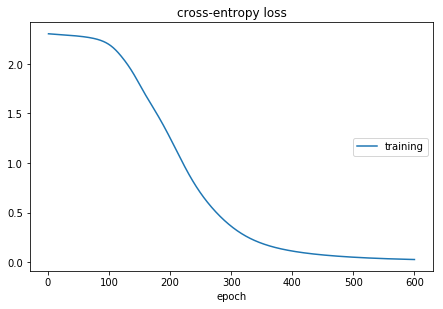

error:  0.0281199299081966


In [50]:
from livelossplot import PlotLosses

weights, bias = initialise_weights(3, output=10)
step = 0.0001

liveplot = PlotLosses()

for i in range(600):
    
    print("iteration: ", i)
    forward_output = forward_propagate(input_vec, weights, bias)
    Z, A, weights, bias = forward_output


    output = [list(Z[-1][a]).index(max(list(Z[-1][a]))) for a in range(len(Z[-1]))]
    test = y_data1[:batch_size]
   
    remain = np.array(output) - np.array(test)
    
    # values will cancel to 0 if they are the same i.e. correct
    right = (batch_size - remain.tolist().count(0))/batch_size*100
    print("Wrong: " + str(right) + "%")

    dw, db, error = back_propagate(input_vec, Z, A, weights, bias, Y)
    
    liveplot.update({
        'cross-entropy loss': error
    })
    liveplot.draw()
    
    print("error: ", error)

    new_weights, new_bias = optimize(weights, dw, bias, db, step_size=step)
    weights = new_weights
    bias = new_bias
